In [4]:
import librosa
import librosa.display
import IPython.display
import pandas as pd
import os
import numpy as np
df=pd.read_csv(r"C:\Users\prana\Downloads\UrbanSound8K\metadata\UrbanSound8K.csv")

In [5]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [6]:
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [9]:
randomAudio=r"C:\Users\prana\Downloads\UrbanSound8K\audio\fold3\6988-5-0-3.wav"

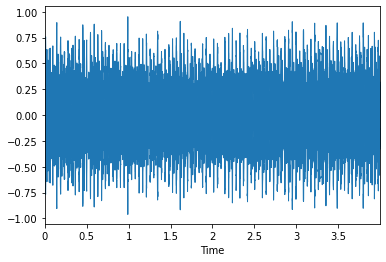

In [11]:
libAudio,sr=librosa.load(randomAudio)
librosa.display.waveplot(libAudio,sr)
IPython.display.Audio(randomAudio)

In [12]:
df["class"].value_counts()

children_playing    1000
engine_idling       1000
drilling            1000
jackhammer          1000
dog_bark            1000
street_music        1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [19]:
def feature_extractor(file):
    audio_data,sample_rate=librosa.load(file,res_type="kaiser_fast")
    mfcc_features=librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=50)
    mfcc_mean=np.mean(mfcc_features.T,axis=0)
    return mfcc_mean

In [20]:
audio_dataset=r"C:\Users\prana\Downloads\UrbanSound8K\audio"
from tqdm import tqdm
extracted_features=[]
for i,row in tqdm(df.iterrows()):
    file=os.path.join(os.path.abspath(audio_dataset),"fold"+str(row["fold"]) + "/",str(row["slice_file_name"]))
    class_labels=row["class"]
    data=feature_extractor(file)
    extracted_features.append([data,class_labels])
    


3555it [04:22, 13.28it/s]C:\Users\prana\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [09:58, 20.04it/s]C:\Users\prana\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [10:25, 13.95it/s]


In [21]:
audio_data=pd.DataFrame(extracted_features,columns=["features","class"])

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
audio_data["class"]=le.fit_transform(audio_data["class"])

In [23]:
x=np.array(audio_data["features"].tolist())
y=np.array(audio_data["class"].tolist())

In [24]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.1,random_state=20)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print("Test score =",100*lr.score(test_x,test_y),"%")
pred_lr=lr.predict(test_x)
pred_lr=pd.DataFrame(pred_lr,columns=["pred"])

Test score = 60.068649885583525 %


C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(train_x,train_y)
print("test score=",100*dt.score(test_x,test_y),"%")
pred_dt=dt.predict(test_x)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

test score= 70.82379862700229 %


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
print("test score=",100*rf.score(test_x,test_y),"%")
pred_rf=rf.predict(test_x)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

test score= 90.2745995423341 %


In [42]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(train_x,train_y)
print("test score=",100*xg.score(test_x,test_y),"%")
pred_xg=xg.predict(test_x)
pred_xg=pd.DataFrame(pred_xg,columns=["pred"])

C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test score= 90.8466819221968 %


In [43]:
from statistics import mode
ensembled_pred=[]
for i in range(0,len(test_x)):
    ensembled_pred.append(mode([pred_lr["pred"][i],pred_dt["pred"][i],pred_rf["pred"][i],pred_xg["pred"][i]]))

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ensembled_pred,test_y)

0.8764302059496567